In [12]:
# Importing tools, functions and dependencies needed

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [2]:
# Loading the trained model which is saved ahead
model = load_model("my_cifar10_cnn_model.h5")

# Splitting and loading the inbuilt dataset (" Cifar10 ")
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
# Normalizing the pixel values
x_train, x_test = x_train/255.0, x_test/255.0

In [4]:
# Creating a list of class names of the images in dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
# Building layers of the CNN

#model = models.Sequential([
    #layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    #layers.MaxPooling2D((2, 2)),

    #layers.Conv2D(64, (3, 3), activation="relu"),
    #layers.MaxPooling2D((2, 2)),

    #layers.Conv2D(64, (3, 3), activation="relu"),
    #layers.Flatten(),

    #layers.Dense(64, activation="relu"),
    #layers.Dense(10, activation="softmax")
#])

In [6]:
# Compiling and fitting the model

#model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

#model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

In [7]:
#Saving the model

#model.save("my_cifar10_cnn_model.h5")

In [8]:
# Evaluating the model

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 2s - loss: 0.8682 - accuracy: 0.7115 - 2s/epoch - 6ms/step
Test accuracy: 0.7114999890327454


In [9]:
# Predicting using the test data

preds = model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


In [10]:
# Gives the highest predicted value of the class and getting the same shape as y_preds

pred_classes = np.argmax(preds, axis=1)
y_true = y_test.flatten()

In [11]:
# Evaluating using classification report

print(classification_report(y_true, pred_classes, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.72      0.78      0.75      1000
  automobile       0.77      0.86      0.81      1000
        bird       0.65      0.57      0.61      1000
         cat       0.53      0.48      0.50      1000
        deer       0.67      0.69      0.68      1000
         dog       0.55      0.70      0.62      1000
        frog       0.83      0.75      0.79      1000
       horse       0.81      0.74      0.77      1000
        ship       0.80      0.82      0.81      1000
       truck       0.84      0.71      0.77      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000



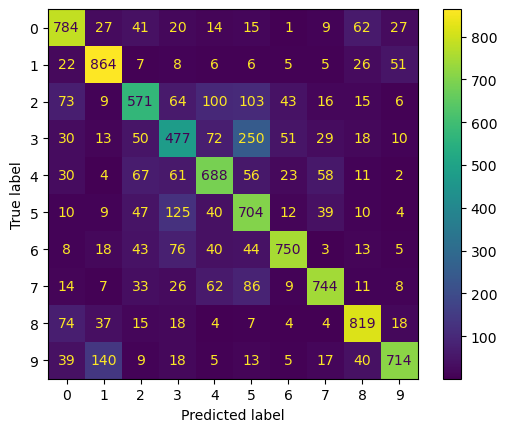

In [16]:
# Evaluating using confusion matrix

ConfusionMatrixDisplay.from_predictions(y_true=y_true, y_pred = pred_classes)